In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
dftrainy = pd.read_csv('data/training_set_labels.csv')
dftrainx = pd.read_csv('data/training_set_features.csv')


In [2]:
df = pd.merge(dftrainy, dftrainx, on='respondent_id', how='outer')

In [3]:
df.fillna('unknown', inplace=True)


In [4]:
df.isna().sum()

respondent_id                  0
h1n1_vaccine                   0
seasonal_vaccine               0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_ow

In [5]:
df

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1,0,0,0,0,0,0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,unknown,unknown
1,1,0,1,3,2,0,1,0,1,0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe
2,2,0,0,1,1,0,1,0,0,0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo
3,3,0,1,1,1,0,1,0,1,1,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,unknown,unknown
4,4,0,0,2,1,0,1,0,1,1,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,2,0,0,1,0,0,0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0,0,unknown,unknown
26703,26703,0,0,1,2,0,1,0,1,0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1,0,fcxhlnwr,cmhcxjea
26704,26704,0,1,2,2,0,1,1,1,1,...,unknown,Not Married,Own,unknown,lzgpxyit,"MSA, Not Principle City",0,0,unknown,unknown
26705,26705,0,0,1,1,0,0,0,0,0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1,0,fcxhlnwr,haliazsg


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
ohe = OneHotEncoder(handle_unknown='ignore')


In [7]:
X= df.drop(['seasonal_vaccine', 'respondent_id'], axis=1)
y = df['seasonal_vaccine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)
ohe.fit(X_train)

OneHotEncoder(handle_unknown='ignore')

In [9]:
X_train_ohe = ohe.transform(X_train)
X_test_ohe = ohe.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000)
logreg.fit(X_train_ohe, y_train)
y_pred = logreg.predict(X_test_ohe)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8088730812429802
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      2891
           1       0.81      0.77      0.79      2451

    accuracy                           0.81      5342
   macro avg       0.81      0.81      0.81      5342
weighted avg       0.81      0.81      0.81      5342



In [38]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.7868030904155355

In [13]:
C_values = [0.001, 0.01, 0.1, 1, 10]

best_f1_score = 0
best_C = None

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train_ohe, y_train)
    y_pred = model.predict(X_test_ohe)
    f1 = f1_score(y_test, y_pred)

    if f1 > best_f1_score:
        best_f1_score = f1
        best_C = C

In [14]:
best_C

0.1

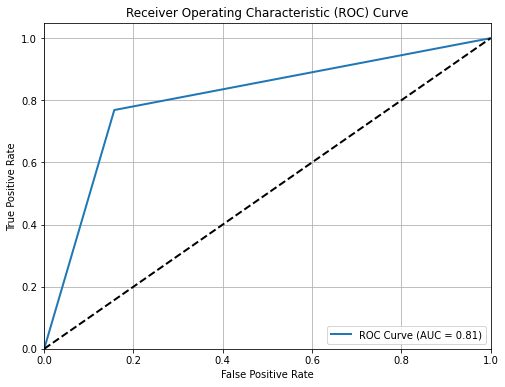

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()